In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline


In [2]:
bank=pd.read_csv('C:\\Users\\asus\\OneDrive\\Documents\\bank\\bank.csv',sep=';')
bank.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.shape

(4521, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.duplicated().sum()

0

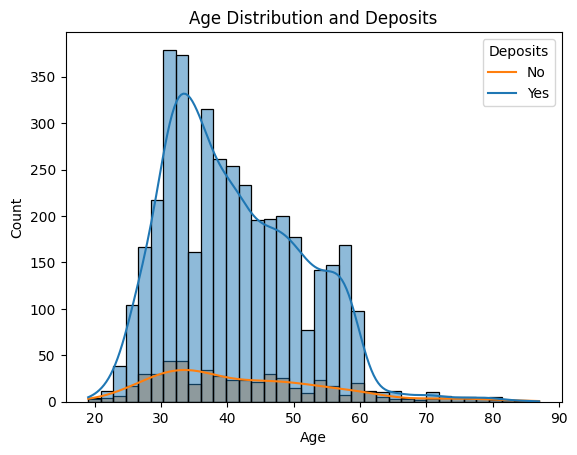

In [9]:
fig, ax = plt.subplots()
sns.histplot(data=bank, x="age", kde=True, hue="y", ax=ax)
ax.set_title("Age Distribution and Deposits")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.legend(title="Deposits", labels=["No", "Yes"])

# Show the plot
plt.show()


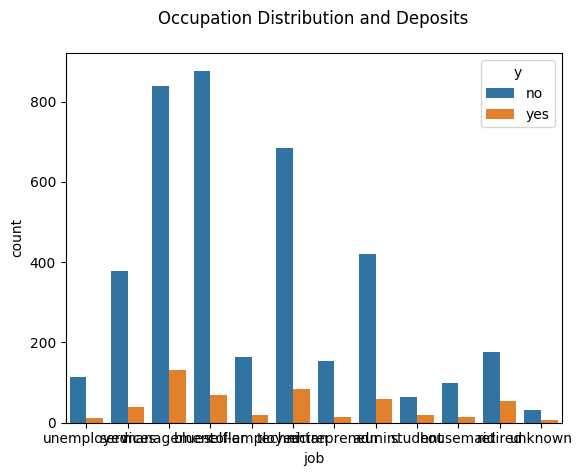

<Figure size 1500x400 with 0 Axes>

In [10]:
(
    sns.countplot(x="job", data=bank, hue="y")
    .set(title="Occupation Distribution and Deposits\n")
)
plt.figure(figsize=(15, 4))
plt.show()

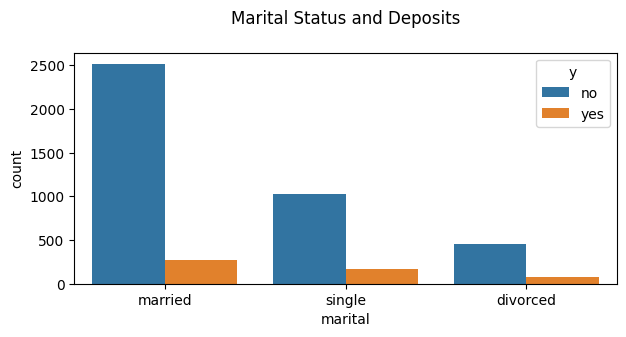

In [11]:
plt.figure(figsize=(7, 3))
sns.countplot(x="marital", data=bank, hue="y")
plt.title("Marital Status and Deposits\n")

# Show the plot
plt.show()

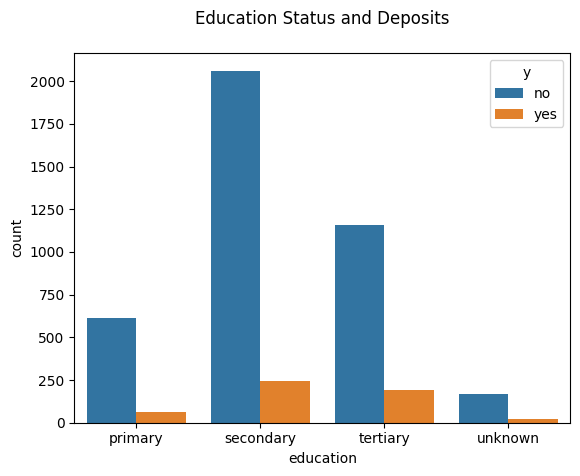

<Figure size 1200x400 with 0 Axes>

In [12]:

(
    bank
    .pipe(sns.countplot, x="education", hue="y")
    .set(title="Education Status and Deposits\n")
)
plt.figure(figsize=(12, 4))
plt.show()

In [13]:
bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

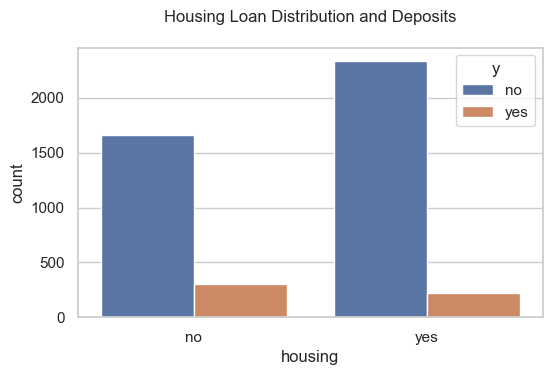

In [14]:
plt.figure(figsize=(6, 3.5))
sns.set(style="whitegrid")  
sns.countplot(x="housing", data=bank, hue="y")

# Set the title
plt.title("Housing Loan Distribution and Deposits\n")

# Show the plot
plt.show()

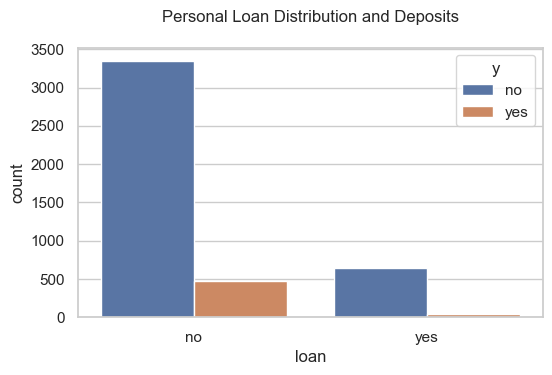

In [15]:
fig, ax = plt.subplots(figsize=(6, 3.5))
sns.countplot(x="loan", data=bank, hue="y", ax=ax)

# Set the title of the plot
ax.set_title("Personal Loan Distribution and Deposits\n")

# Show the plot
plt.show()

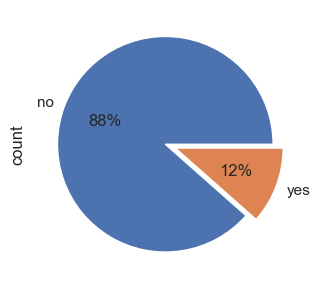

In [16]:
value_counts = bank['y'].value_counts()
plt.figure(figsize=(6, 3.5))
value_counts.plot(kind='pie', explode=[0, 0.1], autopct='%.0f%%', labels=value_counts.index)
plt.show()

In [17]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank[cols] = bank[cols].apply(le.fit_transform)


In [19]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


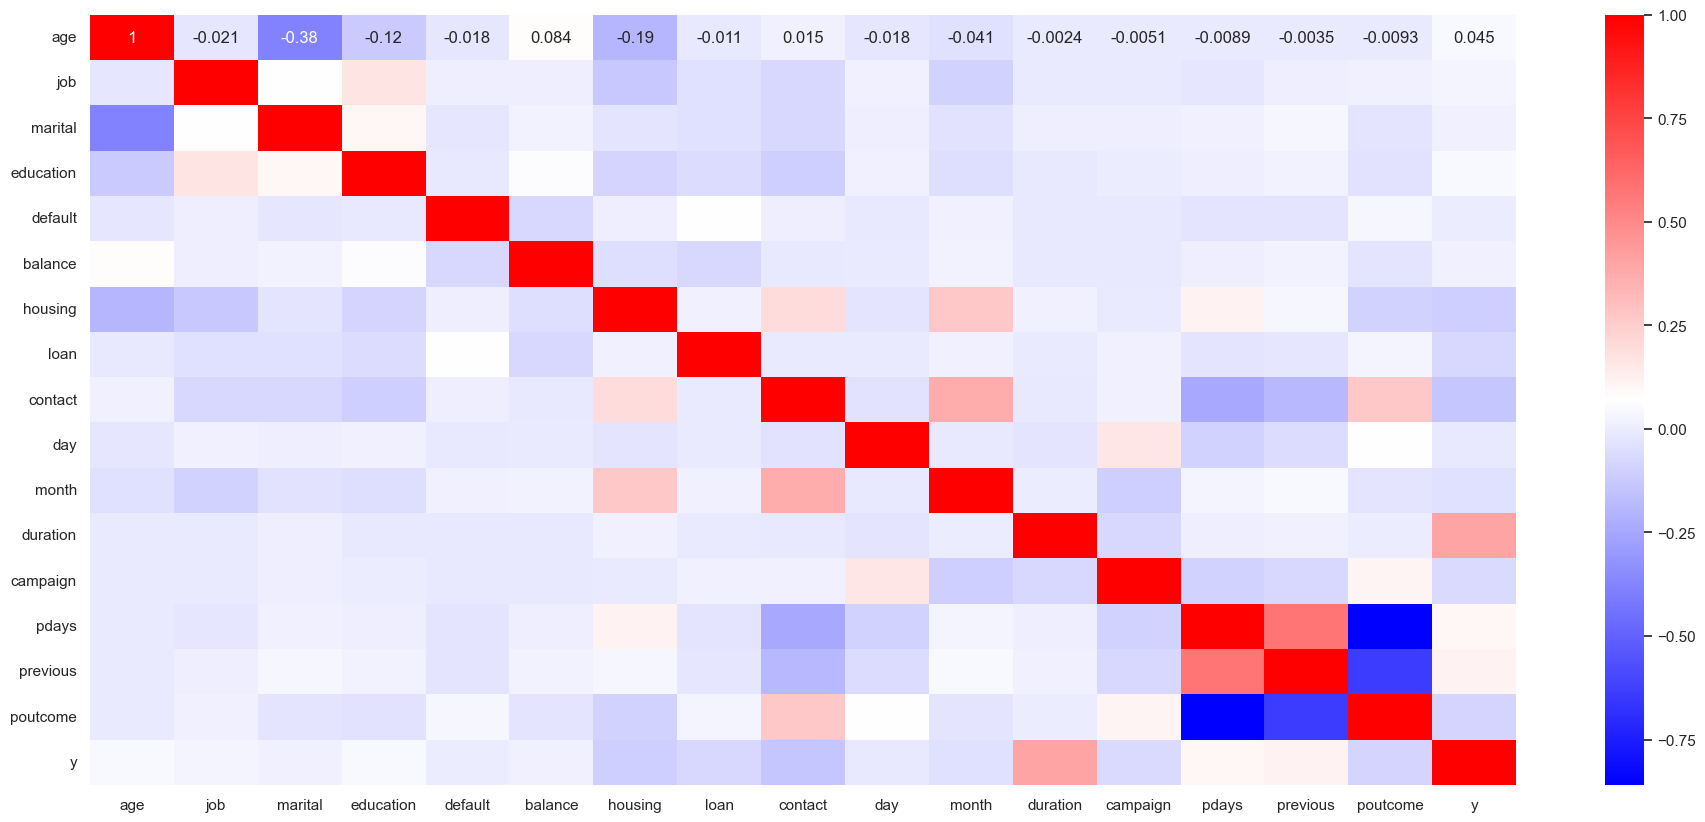

In [20]:
fig, ax = plt.subplots(figsize=(23, 10))
heatmap = sns.heatmap(bank.corr(), cmap='bwr', annot=True, ax=ax)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = bank.drop("y", axis=1)
y = bank.y
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [22]:
#Train-test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [23]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))    

Train Score: 1.0
Test Score: 0.8747236551215918


In [24]:
from sklearn.metrics import classification_report
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1203
           1       0.45      0.46      0.46       154

    accuracy                           0.87      1357
   macro avg       0.69      0.69      0.69      1357
weighted avg       0.88      0.87      0.88      1357



In [25]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [26]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [27]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}

In [28]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.8922275881376607

In [30]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [31]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9190897597977244
Test Score: 0.8968312453942521


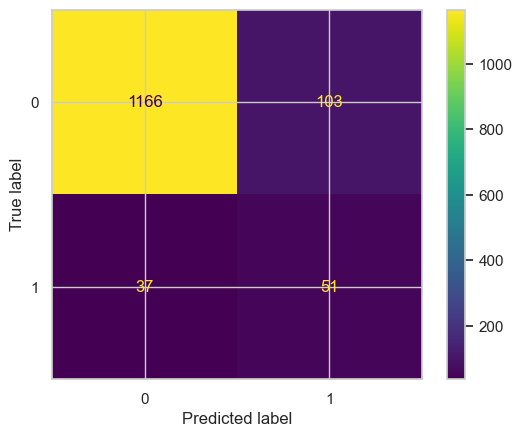

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pred_y = clf.predict(test_X)
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [33]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1269
           1       0.33      0.58      0.42        88

    accuracy                           0.90      1357
   macro avg       0.65      0.75      0.68      1357
weighted avg       0.93      0.90      0.91      1357



In [34]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 89.68312453942521


In [35]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  89.46141740829174


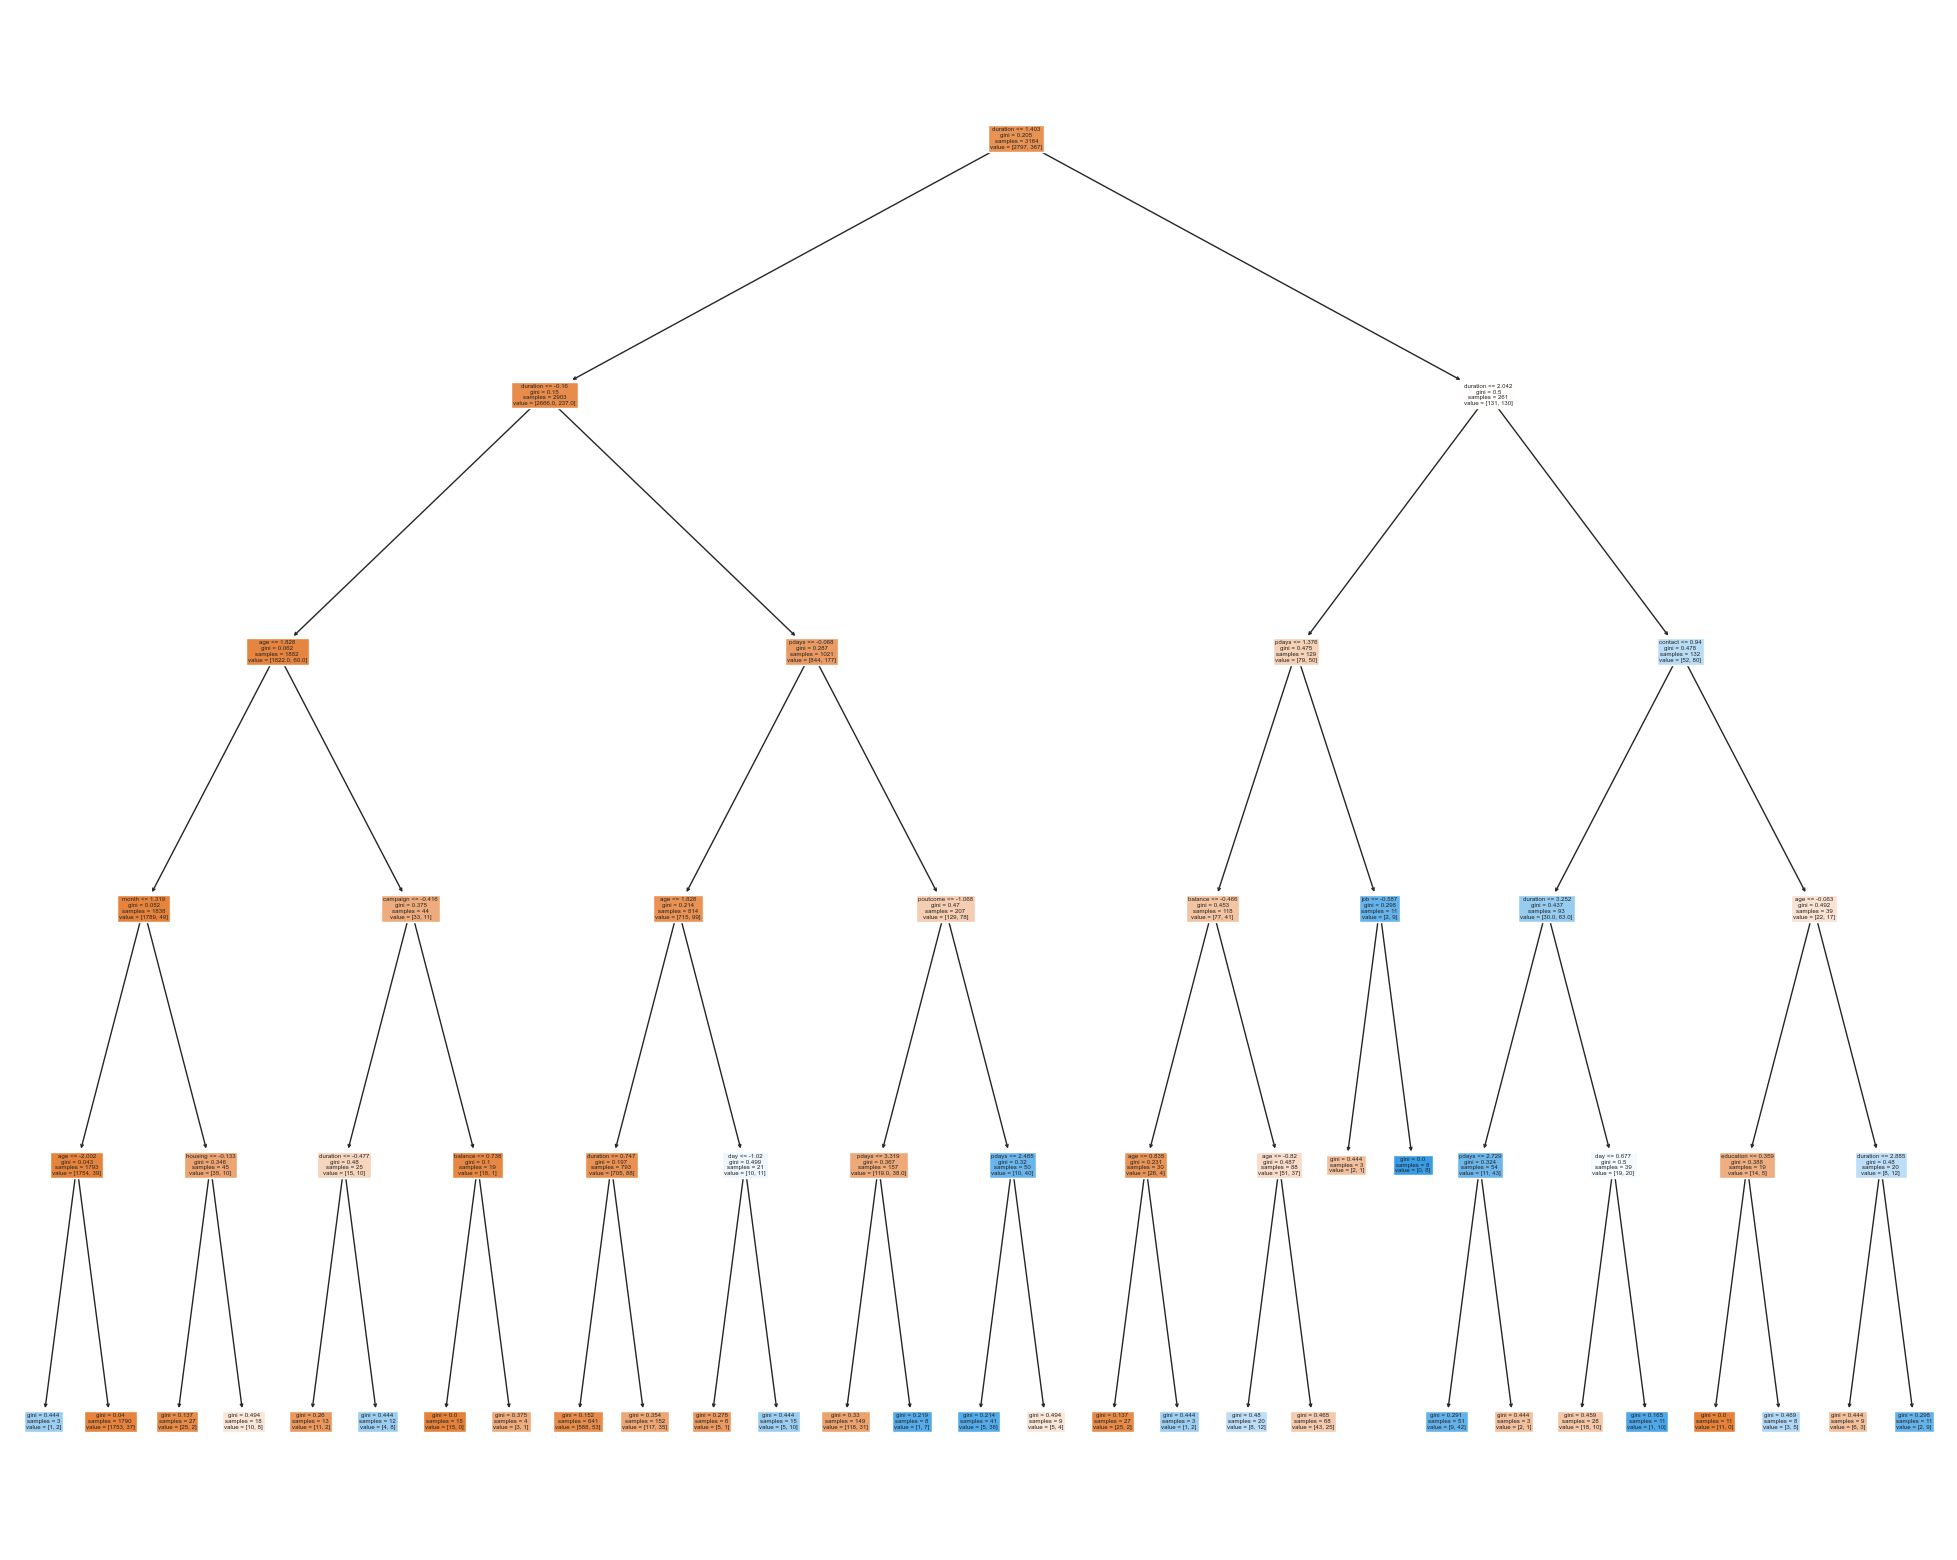

In [36]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)